<a href="https://colab.research.google.com/github/sugatoray/stackoverflow/blob/master/src/answers/Q_64531792/Q_64531792.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identification of Clusters in Data using **KMeans** Method 

> This a solution to stackoverflow question [**64531792**][#Q]: [_Clustering between two sets of data points - Python_][#Q]. 

[#Q]: https://stackoverflow.com/questions/64531792/clustering-between-two-sets-of-data-points-python

We will used [`sklearn.cluster.KMeans`][#sklearn-kMeans] to identify the clusters. The attribute `model.cluster_centers_` will give us the predicted cluster centers. Say, we want to find out `5` clusters in our training data, `X_train` with shape: `(n_samples, n_features)` and labels, `y_train` with shape: `(n_samples,)`. The following code block fits the model to the data (`X_train`) and then predicts `y` and saves the prediction in `y_pred_train` variable.

```python
# Define model
model = KMeans(n_clusters = 5)
# Fit model to training data
model.fit(X_train)
# Make prediction on training data
y_pred_train = model.predict(X_train)
# Get predicted cluster centers
model.cluster_centers_
```

[#sklearn-kMeans]: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## Import Libraries

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import pprint

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina' 
plt.style.use('seaborn-white')

## Dummy Data

We will use data generated in the following code-block. By design we create a dataset with `5` clusters and the following specifications. And then split the data into `train` and `test` blocks using `sklearn.model_selection.train_test_split`.

```python
## Creating data with 
#  n_samples = 2500
#  n_features = 4
#  Expected clusters = 5
#     centers = 5
#     cluster_std = [1.0, 2.5, 0.5, 1.5, 2.0]
```

In [55]:
NUM_SAMPLES = 2500
RANDOM_STATE = 42
NUM_FEATURES = 4
NUM_CLUSTERS = 5
CLUSTER_STD = [1.0, 2.5, 0.5, 1.5, 2.0]

TEST_SIZE = 0.20

def dummy_data():     
    ## Creating data with 
    #  n_samples = 2500
    #  n_features = 4
    #  Expected clusters = 5
    #     centers = 5
    #     cluster_std = [1.0, 2.5, 0.5, 1.5, 2.0]
    X, y = make_blobs(
        n_samples = NUM_SAMPLES, 
        random_state = RANDOM_STATE, 
        n_features = NUM_FEATURES, 
        centers = NUM_CLUSTERS, 
        cluster_std = CLUSTER_STD
    )
    return X, y

def test_dummy_data(X, y):
    assert X.shape == (NUM_SAMPLES, NUM_FEATURES), "Shape mismatch for X"
    assert set(y) == set(np.arange(NUM_CLUSTERS)), "NUM_CLUSTER mismatch for y"

## Create Dummy Data
X, y = dummy_data()
test_dummy_data(X, y)

## Create test-train-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

## Custom Functions

We will use the following `3` custom defined functions:

- `get_cluster_centers()`
- `scatterplot()`
- `add_cluster_centers()`

In [188]:
def get_cluster_centers(X, y, num_clusters=None):
    """Returns the cluster-centers as numpy.array of 
    shape: (num_cluster, num_features).
    """
    num_clusters = NUM_CLUSTERS if (num_clusters is None) else num_clusters
    return np.stack([X[y==i].mean(axis=0) for i in range(NUM_CLUSTERS)])

def scatterplot(X, y, 
                cluster_centers=None, 
                alpha=0.5, 
                cmap='viridis', 
                legend_title="Classes", 
                legend_loc="upper left", 
                ax=None):
    if ax is not None:
        plt.sca(ax)
    scatter = plt.scatter(X[:, 0], X[:, 1], 
                          s=None, c=y, alpha=alpha, cmap=cmap)
    legend = ax.legend(*scatter.legend_elements(),
                        loc=legend_loc, title=legend_title)
    ax.add_artist(legend)
    if cluster_centers is not None:
       plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
                   marker='o', color='red', alpha=1.0)
    ax = plt.gca()
    return ax

def add_cluster_centers(true_cluster_centers=None, 
                        pred_cluster_centers=None, 
                        markers=('o', 's'), 
                        colors=('red, ''orange'), 
                        s = (None, 200), 
                        alphas = (1.0, 0.5), 
                        center_labels = ('true', 'pred'), 
                        legend_title = "Cluster Centers", 
                        legend_loc = "upper right", 
                        ax = None):
    if ax is not None:
        plt.sca(ax)
    for idx, cluster_centers in enumerate([true_cluster_centers, 
                                           pred_cluster_centers]):        
        if cluster_centers is not None:
            scatter = plt.scatter(
                cluster_centers[:, 0], cluster_centers[:, 1], 
                marker = markers[idx], 
                color = colors[idx], 
                s = s[idx], 
                alpha = alphas[idx],
                label = center_labels[idx]
            )
    legend = ax.legend(loc=legend_loc, title=legend_title)
    ax.add_artist(legend)
    return ax

## Calculate `True` Cluster Centers

We will calculate the `true` cluster centers for `train` and `test` datasets and save the results to a `dict`: `true_cluster_centers`.

In [165]:
true_cluster_centers = {
    'train': get_cluster_centers(X = X_train, y = y_train, num_clusters = NUM_CLUSTERS), 
    'test': get_cluster_centers(X = X_test, y = y_test, num_clusters = NUM_CLUSTERS)
}
# Show result
pprint.pprint(true_cluster_centers, indent=2)

{ 'test': array([[-2.44425795,  9.06004013,  4.7765817 ,  2.02559904],
       [-6.68967507, -7.09292101, -8.90860337,  7.16545582],
       [ 1.99527271,  4.11374524, -9.62610383,  9.32625443],
       [ 6.46362854, -5.90122349, -6.2972843 , -6.04963714],
       [-4.07799392,  0.61599582, -1.82653858, -4.34758032]]),
  'train': array([[-2.49685525,  9.08826   ,  4.64928719,  2.01326914],
       [-6.82913109, -6.86790673, -8.99780554,  7.39449295],
       [ 2.04443863,  4.12623661, -9.64146529,  9.39444917],
       [ 6.74707792, -5.83405806, -6.3480674 , -6.37184345],
       [-3.98420601,  0.45335025, -1.23919526, -3.98642807]])}


## Define, Fit and Predict using `KMeans` Model

In [48]:
model = KMeans(n_clusters = NUM_CLUSTERS, random_state = RANDOM_STATE)
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Predict for `y_train` using `X_train`

In [124]:
## Process Prediction: train data
y_pred_train = model.predict(X_train)
# get model predicted cluster-centers
pred_train_cluster_centers = model.cluster_centers_ # shape: (n_cluster, n_features)

# sanity check
assert all([
    y_pred_train.shape == (NUM_SAMPLES * (1 - TEST_SIZE),), 
     set(y_pred_train) == set(y_train)
])

### Predict for `y_test` using `X_test`

In [125]:
## Process Prediction: test data
y_pred_test = model.predict(X_test)
# get model predicted cluster-centers
pred_test_cluster_centers = model.cluster_centers_ # shape: (n_cluster, n_features)

# sanity check
assert all([
    y_pred_test.shape == (NUM_SAMPLES * TEST_SIZE,), 
     set(y_pred_test) == set(y_test)
])

## Make Figure with `train`, `test` and `prediction` data

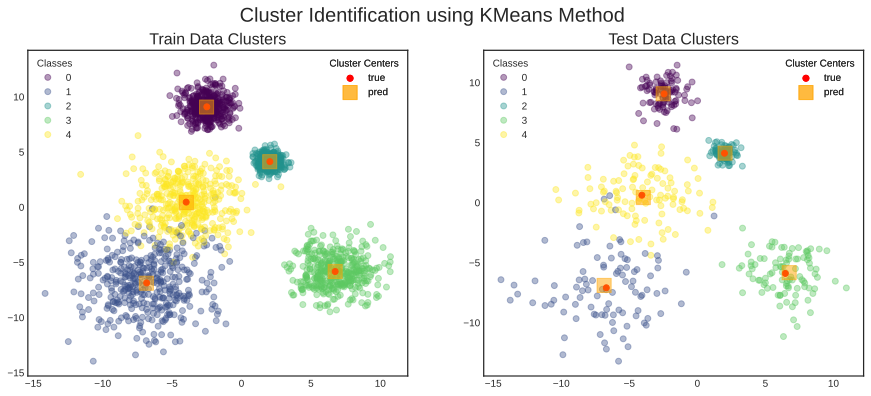

In [198]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

FONTSIZE = {'title': 16, 'suptitle': 20}
TITLE = {
    'train': 'Train Data Clusters', 
    'test': 'Test Data Clusters', 
    'suptitle': 'Cluster Identification using KMeans Method', 
}
CENTER_LEGEND_LABELS = ('true', 'pred')

LAGEND_PARAMS = {
    'data': {'title': "Classes", 'loc': "upper left"}, 
    'cluster_centers': {'title': "Cluster Centers", 'loc': "upper right"}
}

SCATTER_ALPHA = 0.4 
CMAP = 'viridis'

CLUSTER_CENTER_PLOT_PARAMS = dict(
    markers = ('o', 's'), 
    colors = ('red', 'orange'), 
    s = (None, 200), 
    alphas = (1.0, 0.5), 
    center_labels = CENTER_LEGEND_LABELS,      
    legend_title = LAGEND_PARAMS['cluster_centers']['title'], 
    legend_loc = LAGEND_PARAMS['cluster_centers']['loc']
)

SCATTER_PLOT_PARAMS = dict(
    alpha = SCATTER_ALPHA, 
    cmap = CMAP, 
    legend_title = LAGEND_PARAMS['data']['title'], 
    legend_loc = LAGEND_PARAMS['data']['loc'],
)

## plot train data
data_label = 'train'
ax = axs[0]

plt.sca(ax)
ax = scatterplot(X = X_train, y = y_train, 
                 cluster_centers = None,                   
                 ax = ax, **SCATTER_PLOT_PARAMS)
ax = add_cluster_centers(
    true_cluster_centers = true_cluster_centers[data_label],
    pred_cluster_centers = pred_train_cluster_centers,     
    ax = ax, **CLUSTER_CENTER_PLOT_PARAMS)
plt.title(TITLE[data_label], fontsize = FONTSIZE['title'])

## plot test data
data_label = 'test'
ax = axs[1]

plt.sca(ax)
ax = scatterplot(X = X_test, y = y_test, 
                 cluster_centers = None, 
                 ax = ax, **SCATTER_PLOT_PARAMS)
ax = add_cluster_centers(
    true_cluster_centers = true_cluster_centers[data_label],
    pred_cluster_centers = pred_test_cluster_centers, 
    ax = ax, **CLUSTER_CENTER_PLOT_PARAMS)
plt.title(TITLE[data_label], fontsize = FONTSIZE['title'])

plt.suptitle(TITLE['suptitle'], 
             fontsize = FONTSIZE['suptitle'])

plt.show()
# save figure
fig.savefig("kmeans_fit_result_train_and_test.png", dpi=300)

## Scrap Work

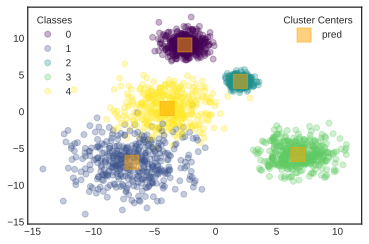

In [185]:
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], 
                      s=None, c=y_train, alpha=0.3, cmap='viridis')
#plt.labels(labels['train'])
# produce a legend with the unique colors from the scatter
ax = plt.gca()
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes", 
                    framealpha=0.9, shadow=True, 
                    fancybox=True, facecolor='lightgray')
ax.add_artist(legend1)
scatter2 = plt.scatter(train_cluster_centers[:, 0], 
                       train_cluster_centers[:, 1], 
                       marker='s', color='orange', s = 200, 
                       alpha=0.5, label='pred')
ax.legend(title='Cluster Centers', 
          framealpha=0.9, shadow=True, fancybox=True, facecolor='lightgray')

## References